Loaded FD001: 16527 snapshots.

 T    W  Oracle_Ratio  Paranoid_Ratio   Gap
15 0.10          0.05           0.766 0.716
15 0.25          0.05           0.948 0.898
15 0.50          0.05           1.250 1.200
15 0.75          0.05           1.552 1.502
15 1.00          0.05           1.854 1.804
15 1.25          0.05           2.156 2.106
15 1.50          0.05           2.458 2.408
15 2.00          0.05           3.062 3.012
20 0.10          0.05           0.579 0.529
20 0.25          0.05           0.711 0.661
20 0.50          0.05           0.930 0.880
20 0.75          0.05           1.149 1.099
20 1.00          0.05           1.367 1.317
20 1.25          0.05           1.586 1.536
20 1.50          0.05           1.805 1.755
20 2.00          0.05           2.243 2.193
30 0.10          0.05           0.387 0.337
30 0.25          0.05           0.467 0.417
30 0.50          0.05           0.601 0.551
30 0.75          0.05           0.734 0.684
30 1.00          0.05           0.868 0.818


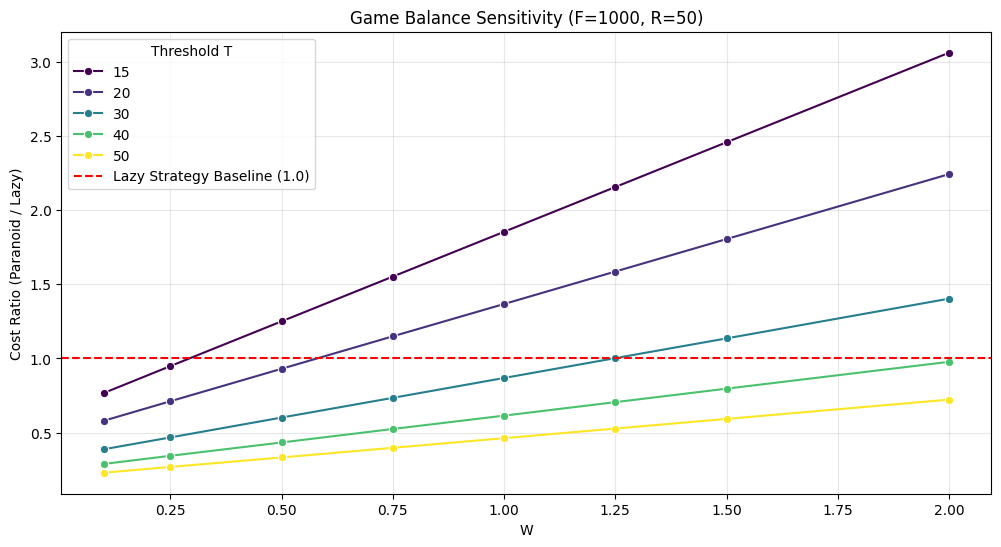

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
DATA_PATH = '../data/scenarios/FD001/train_FD001.csv'

# Fixed Parameters
F_COST = 1000  # Failure Cost
R_COST = 50    # Repair Cost

def calculate_portfolio_costs(df, T, W, F, R):
    """Calculates the total cost for 3 baseline strategies."""
    rul = df['RUL'].values
    
    # 1. Oracle: Act exactly when RUL <= T
    oracle_acts = (rul <= T)
    cost_oracle = np.sum(oracle_acts * R)
    
    # 2. Lazy: Never act
    failures = (rul <= T)
    cost_lazy = np.sum(failures * F)
    
    # 3. Paranoid: Always act
    # If RUL <= T: Cost is R
    # If RUL > T:  Cost is R + W * (RUL - T)
    wasted_life = np.maximum(0, rul - T)
    cost_paranoid = len(rul) * R + np.sum(wasted_life * W)
    
    return {
        "Oracle": cost_oracle,
        "Lazy": cost_lazy,
        "Paranoid": cost_paranoid
    }

def run_sensitivity_analysis():
    df = pd.read_csv(DATA_PATH)
    print(f"Loaded FD001: {len(df)} snapshots.\n")
    
    t_values = [15, 20, 30, 40, 50]
    w_values = [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0] # Added 1.25 and 1.5 for granularity
    
    results = []
    
    for t in t_values:
        for w in w_values:
            costs = calculate_portfolio_costs(df, T=t, W=w, F=F_COST, R=R_COST)
            base = costs['Lazy']
            
            results.append({
                'T': t, 
                'W': w, 
                'Oracle_Ratio': round(costs['Oracle'] / base, 3),
                'Paranoid_Ratio': round(costs['Paranoid'] / base, 3),
                'Gap': round((costs['Paranoid'] - costs['Oracle']) / base, 3)
            })
            
    res_df = pd.DataFrame(results)
    
    # Display the full table
    pd.set_option('display.max_rows', None)
    print(res_df.to_string(index=False))
    
    # Plotting (kept for completeness)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=res_df, x='W', y='Paranoid_Ratio', hue='T', marker='o', palette='viridis')
    plt.axhline(1.0, color='red', linestyle='--', label='Lazy Strategy Baseline (1.0)')
    plt.title(f"Game Balance Sensitivity (F={F_COST}, R={R_COST})")
    plt.ylabel("Cost Ratio (Paranoid / Lazy)")
    plt.grid(True, alpha=0.3)
    plt.legend(title='Threshold T')
    plt.show()

if __name__ == "__main__":
    run_sensitivity_analysis()

In [ ]:
import pandas as pd

# Load Data
df = pd.read_csv('../data/scenarios/FD001/train_FD001.csv')

# Check Class Balance for different Thresholds
thresholds = [15, 20, 30, 40, 50]
print(f"Total Snapshots: {len(df)}")
print("-" * 30)
print(f"{'T (Cycles)':<10} | {'Positives':<10} | {'Rate (%)':<10}")
print("-" * 30)

for t in thresholds:
    n_pos = (df['RUL'] <= t).sum()
    rate = (n_pos / len(df)) * 100
    print(f"{t:<10} | {n_pos:<10} | {rate:.1f}%")

Total Snapshots: 16527
------------------------------
T (Cycles) | Positives  | Rate (%)  
------------------------------
15         | 1280       | 7.7%
20         | 1680       | 10.2%
30         | 2480       | 15.0%
40         | 3280       | 19.8%
50         | 4080       | 24.7%


In [4]:
import pandas as pd

# Load Data
df = pd.read_csv('../data/scenarios/FD002/train_FD002.csv')

# Check Class Balance for different Thresholds
thresholds = [15, 20, 30, 40, 50]
print(f"Total Snapshots: {len(df)}")
print("-" * 30)
print(f"{'T (Cycles)':<10} | {'Positives':<10} | {'Rate (%)':<10}")
print("-" * 30)

for t in thresholds:
    n_pos = (df['RUL'] <= t).sum()
    rate = (n_pos / len(df)) * 100
    print(f"{t:<10} | {n_pos:<10} | {rate:.1f}%")

Total Snapshots: 43301
------------------------------
T (Cycles) | Positives  | Rate (%)  
------------------------------
15         | 3328       | 7.7%
20         | 4368       | 10.1%
30         | 6448       | 14.9%
40         | 8528       | 19.7%
50         | 10608      | 24.5%


In [5]:
import pandas as pd

# Load Data
df = pd.read_csv('../data/scenarios/FD003/train_FD003.csv')

# Check Class Balance for different Thresholds
thresholds = [15, 20, 30, 40, 50]
print(f"Total Snapshots: {len(df)}")
print("-" * 30)
print(f"{'T (Cycles)':<10} | {'Positives':<10} | {'Rate (%)':<10}")
print("-" * 30)

for t in thresholds:
    n_pos = (df['RUL'] <= t).sum()
    rate = (n_pos / len(df)) * 100
    print(f"{t:<10} | {n_pos:<10} | {rate:.1f}%")

Total Snapshots: 19842
------------------------------
T (Cycles) | Positives  | Rate (%)  
------------------------------
15         | 1280       | 6.5%
20         | 1680       | 8.5%
30         | 2480       | 12.5%
40         | 3280       | 16.5%
50         | 4080       | 20.6%


In [6]:
import pandas as pd

# Load Data
df = pd.read_csv('../data/scenarios/FD004/train_FD004.csv')

# Check Class Balance for different Thresholds
thresholds = [15, 20, 30, 40, 50]
print(f"Total Snapshots: {len(df)}")
print("-" * 30)
print(f"{'T (Cycles)':<10} | {'Positives':<10} | {'Rate (%)':<10}")
print("-" * 30)

for t in thresholds:
    n_pos = (df['RUL'] <= t).sum()
    rate = (n_pos / len(df)) * 100
    print(f"{t:<10} | {n_pos:<10} | {rate:.1f}%")

Total Snapshots: 49521
------------------------------
T (Cycles) | Positives  | Rate (%)  
------------------------------
15         | 3184       | 6.4%
20         | 4179       | 8.4%
30         | 6169       | 12.5%
40         | 8159       | 16.5%
50         | 10149      | 20.5%


In [7]:
import pandas as pd
import numpy as np

# --- Configuration ---
DATA_PATH = '../data/scenarios/FD001/train_FD001.csv'
F_COST = 1000
T_THRESHOLD = 30

def generate_balance_table():
    # 1. Load Data
    df = pd.read_csv(DATA_PATH)
    rul = df['RUL'].values
    N_total = len(rul)
    
    # 2. Calculate Fixed Constants
    # Cost of Lazy Strategy (Fixed by F and Data)
    n_failures = np.sum(rul <= T_THRESHOLD)
    cost_lazy = n_failures * F_COST
    
    # Total Wasted Life (Sum of (RUL - T) for all healthy units)
    # This is the multiplier for W in the Paranoid equation
    wasted_life_sum = np.sum(np.maximum(0, rul - T_THRESHOLD))
    
    print(f"Dataset Stats (FD001):")
    print(f"  Total Units: {N_total}")
    print(f"  Failures (<= {T_THRESHOLD}): {n_failures}")
    print(f"  Cost Lazy (Baseline): {cost_lazy}")
    print(f"  Total Potential Waste: {wasted_life_sum} cycles\n")
    
    # 3. Solve for W given R
    # Equation: Cost_Lazy = (N * R) + (W * Waste_Sum)
    # Rearranged: W = (Cost_Lazy - N * R) / Waste_Sum
    
    r_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    results = []
    for r in r_values:
        # Check if R is already too expensive (impossible to balance with positive W)
        base_repair_cost = N_total * r
        
        if base_repair_cost > cost_lazy:
            w = 0.0 # Even with 0 waste penalty, Paranoid is already worse than Lazy
            note = "Impossible (R too high)"
        else:
            w = (cost_lazy - base_repair_cost) / wasted_life_sum
            note = "Balanced"
            
        results.append({
            "Repair Cost (R)": r,
            "Required Waste (W)": round(w, 4),
            "Note": note
        })
        
    # 4. Output
    res_df = pd.DataFrame(results)
    print("--- Game Balance Table (F=1000, T=30) ---")
    print(res_df.to_string(index=False))

if __name__ == "__main__":
    generate_balance_table()

Dataset Stats (FD001):
  Total Units: 16527
  Failures (<= 30): 2480
  Cost Lazy (Baseline): 2480000
  Total Potential Waste: 1326063 cycles

--- Game Balance Table (F=1000, T=30) ---
 Repair Cost (R)  Required Waste (W)     Note
              10              1.7456 Balanced
              20              1.6209 Balanced
              30              1.4963 Balanced
              40              1.3717 Balanced
              50              1.2470 Balanced
              60              1.1224 Balanced
              70              0.9978 Balanced
              80              0.8731 Balanced
              90              0.7485 Balanced
             100              0.6239 Balanced
